In [ ]:
#|default_exp app.py

In [2]:
#|export
from fastai.vision.all import *
import pathlib
import gradio as gr
plt = platform.system()
if plt == 'Linux': pathlib.WindowsPath = pathlib.PosixPath

def is_albani(path):
  return parent_label(path) == "albani"

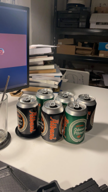

In [6]:
albani = PILImage.create('albani2.jpg')

albani.thumbnail((192, 192))
albani

In [7]:
learn = load_learner(Path('./resnet18-albani.pkl'))

learn.predict(albani)

('True', TensorBase(1), TensorBase([0.0285, 0.9715]))

In [8]:
#|export

learn = load_learner(Path('./resnet18-albani.pkl'))
categories = ('Dårlig Øl', 'Albani')

def classify_image(img):
  pred,idx,probs = learn.predict(img)
  return dict(zip(categories, map(float, probs)))

image = gr.inputs.Image(shape=(192, 192))
label = gr.outputs.Label()
examples = ['albani1.jpg', 'albani2.jpg', 'albani3.jpg']

iface = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
iface.launch(inline=False)
  

/home/lord/mambaforge/envs/fastai/lib/python3.10/site-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/home/lord/mambaforge/envs/fastai/lib/python3.10/site-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/home/lord/mambaforge/envs/fastai/lib/python3.10/site-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/home/lord/mambaforge/envs/fastai/lib/python3.10/site-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
